In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, kendalltau

In [26]:
df_X_train = pd.read_csv("../input/Train_60/X_Train_Data_Input.csv")
df_y_train = pd.read_csv("../input/Train_60/Y_Train_Data_Target.csv")
df_X_test = pd.read_csv("../input/Test_20/X_Test_Data_Input.csv")
df_y_test = pd.read_csv("../input/Test_20/Y_Test_Data_Target.csv")

In [29]:
# Add target
df_train = df_X_train.merge(df_y_train, on="ID")
df_test = df_X_test.merge(df_y_test, on="ID")
del df_X_train, df_y_train, df_X_test, df_y_test

## EDA

In [6]:
n = len(df_train)
cat_cols = []
for col in df_train.columns:
    if col != 'ID' and df_train[col].nunique() / n < 0.03:
        cat_cols.append(col)
        if col != 'target':
            print(col, kendalltau(df_train[col].fillna(df_train[col].median()), df_train['target']))

Column0 SignificanceResult(statistic=-0.07248867266210346, pvalue=0.0)
Column1 SignificanceResult(statistic=-0.3344851071277618, pvalue=0.0)
Column2 SignificanceResult(statistic=-0.09372681624195163, pvalue=0.0)
Column3 SignificanceResult(statistic=0.01697399502100005, pvalue=2.259984220437866e-59)
Column4 SignificanceResult(statistic=0.0024088001429090236, pvalue=0.022045783305351948)
Column10 SignificanceResult(statistic=-0.09722903135033863, pvalue=0.0)
Column11 SignificanceResult(statistic=-0.08641831344142924, pvalue=0.0)
Column12 SignificanceResult(statistic=-0.12842146001820887, pvalue=0.0)
Column13 SignificanceResult(statistic=-0.09436090629102604, pvalue=0.0)
Column16 SignificanceResult(statistic=0.0875907001323361, pvalue=0.0)
Column17 SignificanceResult(statistic=0.4354597434913456, pvalue=0.0)
Column18 SignificanceResult(statistic=0.8270617183538215, pvalue=0.0)
Column19 SignificanceResult(statistic=0.2586085251512952, pvalue=0.0)
Column20 SignificanceResult(statistic=0.135

In [21]:
# Filter out 0 values from the column 18
df_train = df_train[(df_train['Column18']!=0) & (df_train['Column1']!=2495)]
df_test = df_test[(df_test['Column18']!=0) & (df_test['Column1']!=2495)]

In [35]:
kendalltau(df_train['Column2'], df_train['Column17'])

SignificanceResult(statistic=-0.06303038805605592, pvalue=0.0)

In [34]:
df_train['Column17'].unique()

array([  0,   1,  18,   3,  16,   8,   4,  17,   2,  11,  20,  56,  34,
        43,  10,  41,   9,   6,  21,  19,   5,  31, 192,  72,  13,  44,
        14,  25,  65,  22,  12,  26,   7,  30,  48,  40,  78,  28,  55,
        39, 159,  46,  57,  29,  15, 114,  60,  36,  54,  93,  47,  24,
        32,  37,  23, 130,  68,  35,  27, 128,  50,  83,  61,  75,  49,
        38,  33,  42,  74, 101,  58,  45,  73,  59, 116,  71, 143, 147,
        80,  88,  64, 108, 112,  77,  98,  90,  69,  94,  51,  70, 135,
       219,  52, 728,  87,  85,  79, 177, 102,  96,  62, 148,  66,  76,
        82,  53,  81,  63,  86, 122, 164,  67, 113, 104, 214, 103, 188,
        99, 115, 131,  84, 156,  95,  92, 161, 121, 111,  91, 123, 106,
        89, 165, 171, 209, 160, 170, 190, 149, 183, 105, 189, 132, 109,
       117, 166,  97, 100, 126, 136, 168, 118, 107, 157])

<Axes: >

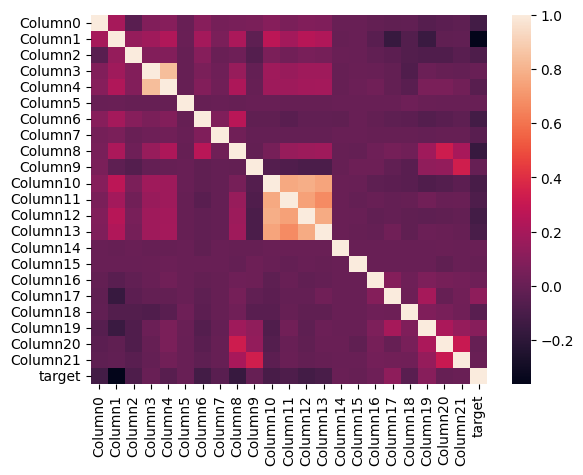

In [16]:
sns.heatmap(df_train.drop('ID', axis=1).corr())

In [65]:
n = len(df_train)
for col in df_train.columns:
    if col != 'ID' and df_train[col].nunique() / n > 0.03:
        print(col, df_train[col].mean(), df_train[col].std())

Column2 2283.6871505032755 1942.6283055477509
Column5 0.005045970833183588 1.4597913432035066
Column6 -0.2756951902311431 0.6173337194780895
Column7 -0.0009893286379455944 0.5294638350705939
Column8 -0.35824722373055595 0.7007261578414168
Column14 0.0013055947443146982 0.006007835510077253
Column15 -0.02312006328197938 3.715898891882045


In [69]:
df_train['Column1'].unique()

array([ 211,    0, 2341, ..., 2362, 2396, 2250])

In [90]:
df_train['target'].value_counts()

target
1    74033
0    26111
Name: count, dtype: int64

<Axes: xlabel='Column3', ylabel='Column4'>

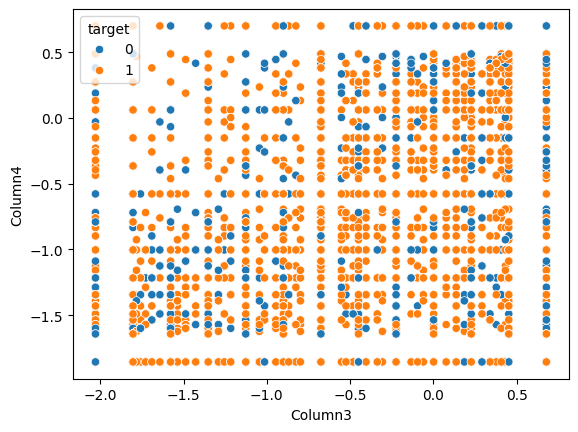

In [89]:
sns.scatterplot(data=df_train, x='Column3', y='Column4', hue='target')

In [79]:
df_train['Column1'].nunique()

2521

In [80]:
df_train['Column2'].nunique()

8183

In [81]:
(df_train['Column1'].astype(str) + '-' + df_train['Column2'].astype(str)).nunique()

76180

In [82]:
(df_train['Column1'] - df_train['Column2']).nunique()

9721

In [83]:
573008 / (2564 * 9424)

0.023714140416210876

In [85]:
pd.crosstab(df_train['Column1'], df_train['target']).sort_values(0)

target,0,1
Column1,,
-936,0,1
2347,0,2
2354,0,1
1955,0,3
1953,0,3
...,...,...
3,65,223
4,65,138
2,97,358


In [86]:
pd.crosstab(df_test['Column1'], df_test['target']).sort_values(0)

target,0,1
Column1,,
1730,0,3
2111,0,1
1246,0,3
1247,0,1
2104,0,2
...,...,...
474,17,5
3,17,59
2,23,126


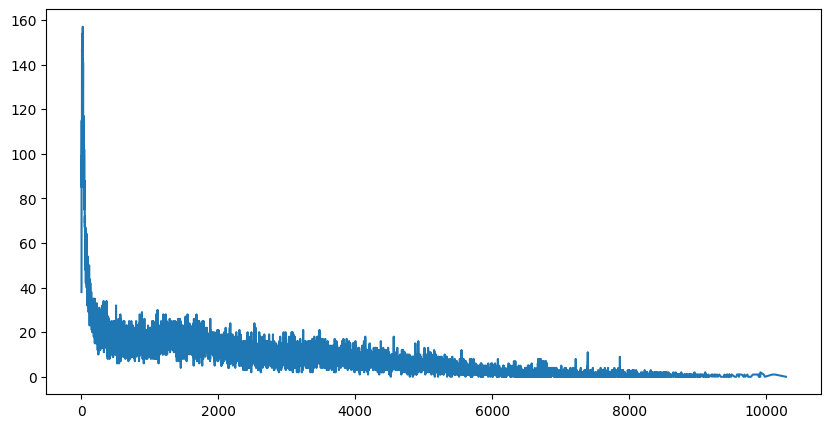

In [92]:
plt.figure(figsize=(10,5))
plt.plot(df_train.groupby('Column2')['target'].sum().loc[list(set(df_train['Column2'].unique()) - set([0,1,2,3]))])

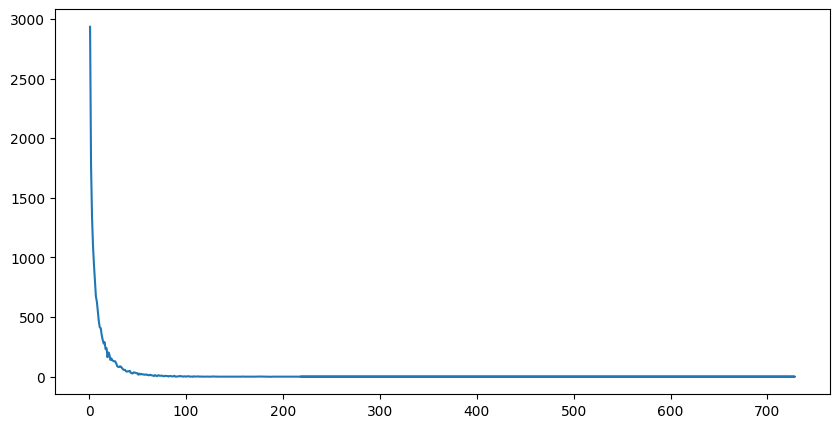

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df_train.groupby('Column17')['target'].sum().loc[list(set(df_train['Column17'].unique()) - set([0]))])

In [96]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.1)
sel.fit(df_train.drop(columns=['ID']))

VarianceThreshold(threshold=0.1)

In [99]:
for b, col in zip(sel.get_support(), df_train.drop(columns=['ID']).columns):
    if not b:
        print(col)

Column14
Column16
Column19
Column20
Column21


Should we remove column 5, 9 and 15?

In [116]:
from sklearn.feature_selection import SelectPercentile, chi2, f_classif, mutual_info_classif
sel = SelectPercentile(f_classif, percentile=90)
sel.fit(df_train.drop(columns=['ID', 'target']).fillna(df_train.drop(columns=['ID']).median()).values, df_train['target'])
for b, col in zip(sel.get_support(), df_train.drop(columns=['ID', 'target']).columns):
    if not b:
        print(col)

Column5
Column9
Column15


In [23]:
df_train['Column2'].nunique(), df_train['Column17'].nunique(), (df_train['Column2'].astype(str) + '-' + df_train['Column17'].astype(str)).nunique()

(8183, 152, 23147)

In [24]:
23147 / (8183 * 152)

0.01860966573834072

In [22]:
25047 / (9424 * 153)

0.017371167482273044

In [10]:
pd.crosstab(df_train['Column2'], df_train['Column17'])

Column17,0,1,2,3,4,5,6,7,8,9,...,177,183,188,189,190,192,209,214,219,728
Column2,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,7,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3.0,18,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,31,6,0,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,35,3,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9981.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10089.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
